<a href="https://colab.research.google.com/github/Osterne/codes_DS_course/blob/main/05_mod_ap_n_sup_01_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

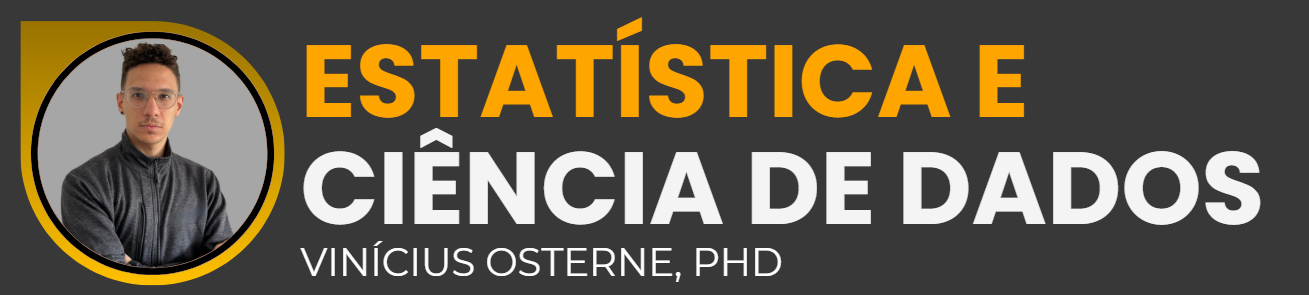

---

# Aprendizado N√£o Supervisionado - M√©todos de Clustering (Agrupamento)

### K-means

---
<br><br><br><br><br>

# Introdu√ß√£o

- O **K-means** √© um algoritmo de **aprendizado n√£o supervisionado**, pertencente √† categoria de **agrupamento (clustering)**.  
- Seu objetivo √© **particionar observa√ß√µes em K grupos (clusters)**, de modo que os pontos dentro de um mesmo cluster sejam mais semelhantes entre si do que em rela√ß√£o a pontos de outros clusters.  
- Para isso, o algoritmo busca **centroides (m√©dias)** que representem cada grupo, minimizando a soma das dist√¢ncias quadr√°ticas entre os pontos e seus respectivos centroides.  
- Na pr√°tica, o K-means procura formar clusters com **alta coes√£o interna (baixa variabilidade intra-cluster)** e **boa separa√ß√£o entre grupos (alta variabilidade inter-cluster)**.  


### Quando usar
- Descobrir **padr√µes ou grupos naturais** em dados num√©ricos sem r√≥tulos.  
- **Segmenta√ß√£o de clientes** em marketing, com base em h√°bitos de consumo.  
- **Compress√£o de dados** (ex.: reduzir cores em uma imagem agrupando pixels).  
- **Inicializa√ß√£o de outros m√©todos** (ex.: mistura de gaussianas ou algoritmos de classifica√ß√£o).  

### Condi√ß√µes impl√≠citas
- Os grupos tendem a ser **esf√©ricos e de tamanho semelhante**.  
- As **vari√°veis precisam estar na mesma escala** (normaliza√ß√£o/padroniza√ß√£o √© essencial).  
- O algoritmo √© **sens√≠vel a outliers**, que podem distorcer os centroides.  
- Tamb√©m √© **sens√≠vel √† escolha de K** (n√∫mero de clusters).  

> ‚ö†Ô∏è **Aten√ß√£o**: K-means n√£o √© indicado para dados categ√≥ricos, clusters de formas arbitr√°rias ou tamanhos muito diferentes.


<br><br><br>


# Estrutura do Modelo

### Objetivo de Otimiza√ß√£o

O K-means procura resolver o seguinte problema de minimiza√ß√£o:

$$
\min_{\{C_k\}, \{\mu_k\}} \sum_{k=1}^{K} \sum_{x_i \in C_k} \| x_i - \mu_k \|^2
$$

- $C_k$: conjunto de pontos no cluster $k$  
- $\mu_k$: centroide do cluster $k$  
- $\| x_i - \mu_k \|^2$: dist√¢ncia euclidiana quadr√°tica entre um ponto $x_i$ e o centroide do cluster.  

Em outras palavras: o objetivo √© encontrar a parti√ß√£o que **minimiza a soma das dist√¢ncias quadradas intra-cluster**.


<br><br><br>


# Algoritmo de Lloyd (passo a passo)

O m√©todo mais usado para implementar o K-means √© o **algoritmo de Lloyd**:

1. **Inicializar** $K$ centroides aleat√≥rios (ou usando m√©todos mais est√°veis, como **K-means++**).  
2. **Atribuir** cada ponto ao centroide mais pr√≥ximo, formando clusters provis√≥rios.  
3. **Atualizar** cada centroide como a m√©dia dos pontos que lhe foram atribu√≠dos.  
4. **Repetir** os passos 2 e 3 at√© convergir (quando n√£o houver mudan√ßa significativa nos centroides ou atingir n√∫mero m√°ximo de itera√ß√µes).

> üîÑ O algoritmo pode convergir para **m√≠nimos locais**, por isso recomenda-se rodar o K-means v√°rias vezes com inicializa√ß√µes diferentes e escolher a solu√ß√£o com menor custo.


<br><br><br>


# Escolha de \(K\)

- A escolha do n√∫mero de clusters ($K$) √© um dos pontos mais cr√≠ticos.  

- N√£o existe uma resposta √∫nica, mas alguns m√©todos pr√°ticos incluem:

- **1. Elbow Method (WSS)**  
  - Analisa a curva da **soma dos quadrados intra-cluster (WSS)** em fun√ß√£o de $K$.  
  - Procura-se o ‚Äúcotovelo‚Äù da curva, onde o ganho de explica√ß√£o de vari√¢ncia come√ßa a diminuir.

- **2. Silhouette**  
  - Mede qu√£o **coeso** √© cada cluster e qu√£o **bem separado** ele est√° dos demais.  
  - O √≠ndice varia de -1 a 1, sendo valores pr√≥ximos de 1 indicativos de melhor separa√ß√£o.

- **3. Gap Statistic**  
  - Compara a dispers√£o intra-cluster obtida com a de uma **distribui√ß√£o de refer√™ncia (aleat√≥ria)**.  
  - Um valor alto de gap indica que a estrutura de clusters √© mais forte que o esperado ao acaso.

> üìå Em aplica√ß√µes reais, muitas vezes a escolha de $K$ tamb√©m depende de **conhecimento do dom√≠nio** e da **interpreta√ß√£o pr√°tica dos grupos**.


<br><br><br>


# Aplica√ß√£o
- Vamos ilustrar o algoritmo apresentado utilizando uma aplica√ß√£o em dados reais



In [10]:
# ## 1) Setup
# - Importar libs
# - Carregar dataset real (palmerpenguins)

# %%
!pip -q install seaborn scikit-learn

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [11]:
# ## 2) Carregar e explorar os dados
# O dataset j√° vem no seaborn: `penguins`
# Vari√°veis:
# - species: esp√©cie do pinguim (Adelie, Chinstrap, Gentoo)
# - island: ilha onde foi observado (Torgersen, Biscoe, Dream)
# - bill_length_mm: comprimento do bico (mm)
# - bill_depth_mm: profundidade/altura do bico (mm)
# - flipper_length_mm: comprimento da nadadeira (mm)
# - body_mass_g: massa corporal (g)
# - sex: sexo (male/female)

# %%
penguins = sns.load_dataset("penguins")
print(penguins.shape)
penguins.head()


(344, 7)


species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [12]:
# ## 3) Selecionar vari√°veis num√©ricas e tratar NA
# Vamos trabalhar apenas com medidas cont√≠nuas.

# %%
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
df = penguins[features].dropna()
df.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0            39.1           18.7              181.0       3750.0
1            39.5           17.4              186.0       3800.0
2            40.3           18.0              195.0       3250.0
4            36.7           19.3              193.0       3450.0
5            39.3           20.6              190.0       3650.0

In [13]:
# ## 4) Padroniza√ß√£o
# Dist√¢ncias euclidianas s√£o sens√≠veis √† escala ‚áí padronizar √© essencial.

from sklearn.preprocessing import StandardScaler, RobustScaler
import pandas as pd

# StandardScaler ‚Üí centraliza m√©dia em 0 e desvio padr√£o em 1
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(df)

# RobustScaler ‚Üí usa mediana e IQR (mais robusto a outliers)
scaler_rob = RobustScaler()
X_rob = scaler_rob.fit_transform(df)

# Converte para DataFrame para inspecionar
df_std = pd.DataFrame(X_std, columns=df.columns)
df_rob = pd.DataFrame(X_rob, columns=df.columns)

print("=== Primeiras linhas com StandardScaler ===")
print(df_std.head(), "\n")

print("=== Primeiras linhas com RobustScaler ===")
print(df_rob.head())


=== Primeiras linhas com StandardScaler ===
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.884499       0.785449          -1.418347    -0.564142
1       -0.811126       0.126188          -1.062250    -0.501703
2       -0.664380       0.430462          -0.421277    -1.188532
3       -1.324737       1.089724          -0.563715    -0.938776
4       -0.847812       1.748985          -0.777373    -0.689020 

=== Primeiras linhas com RobustScaler ===
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0       -0.576819       0.451613          -0.695652    -0.250000
1       -0.533693       0.032258          -0.478261    -0.208333
2       -0.447439       0.225806          -0.086957    -0.666667
3       -0.835580       0.645161          -0.173913    -0.500000
4       -0.555256       1.064516          -0.304348    -0.333333


In [14]:
# Vamos seguir com o StandardScaler (m√©dia=0, desvio=1)
scaler = StandardScaler()
X = scaler.fit_transform(df)

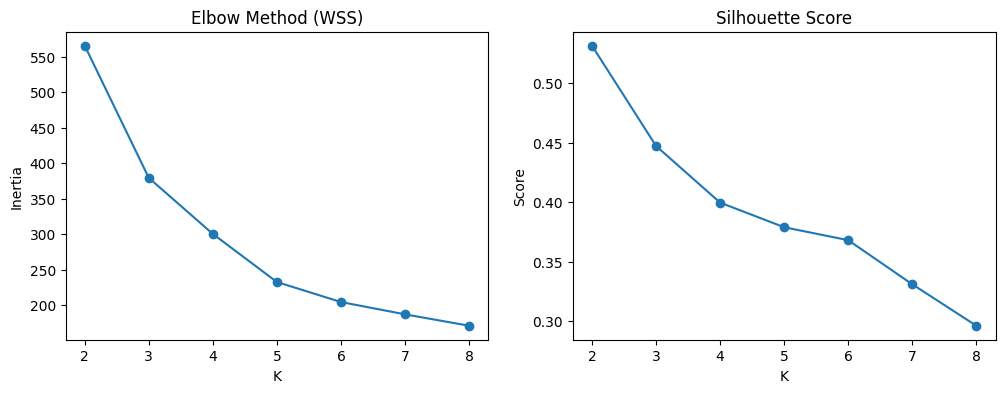

In [15]:
# ## 5) Escolha de K (Elbow + Silhouette)
# Testamos valores de K entre 2 e 8.

# %%
inertia, sil = [], []
K_range = range(2, 9)

for k in K_range:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X)
    inertia.append(km.inertia_)
    sil.append(silhouette_score(X, labels))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Elbow
ax[0].plot(K_range, inertia, marker="o")
ax[0].set_title("Elbow Method (WSS)") #soma das dist√¢ncias quadradas intra-cluster (WSS)
ax[0].set_xlabel("K")
ax[0].set_ylabel("Inertia")

# Silhouette
ax[1].plot(K_range, sil, marker="o")
ax[1].set_title("Silhouette Score") #mede qu√£o coesos est√£o os pontos dentro de um cluster e qu√£o bem separados est√£o dos outros.
ax[1].set_xlabel("K")
ax[1].set_ylabel("Score")

plt.show()

In [16]:
# ## 6) Treinar modelo com K=3
# A an√°lise visual sugere que 3 clusters √© adequado (spoiler: coincide com as esp√©cies reais).

# %%
k = 3
kmeans = KMeans(n_clusters=k, n_init=30, random_state=42)
labels = kmeans.fit_predict(X)

df_clustered = df.copy()
df_clustered["cluster"] = labels
df_clustered.head()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  cluster
0            39.1           18.7              181.0       3750.0        2
1            39.5           17.4              186.0       3800.0        2
2            40.3           18.0              195.0       3250.0        2
4            36.7           19.3              193.0       3450.0        2
5            39.3           20.6              190.0       3650.0        2

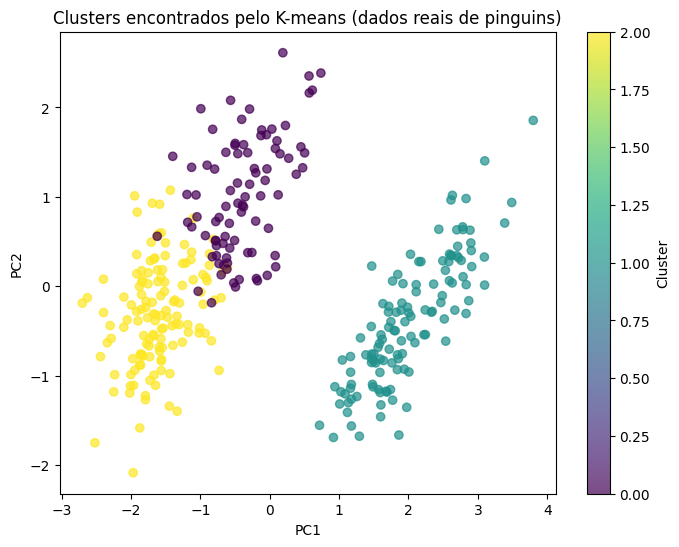

In [17]:
# ## 7) Visualiza√ß√£o 2D via PCA
# Reduzimos para 2 dimens√µes e colorimos por cluster atribu√≠do pelo K-means.

# %%
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters encontrados pelo K-means (dados reais de pinguins)")
plt.colorbar(label="Cluster")
plt.show()

In [18]:
# ## 8) Perfil dos clusters
# Olhando a m√©dia de cada vari√°vel em cada grupo ‚Üí interpreta√ß√£o pr√°tica.

# %%
df_clustered.groupby("cluster").mean().round(1)

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
cluster                                                               
0                  47.5           18.8              196.9       3902.0
1                  47.5           15.0              217.2       5076.0
2                  38.2           18.1              188.4       3584.7